# # Analysis and Visualisation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df["mean score"] = ((df["math score"] + df["reading score"] + df["writing score"]) / 3).round()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [7]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# # Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df['gender'] = lc.fit_transform(df['gender'])
df['race/ethnicity'] = lc.fit_transform(df['race/ethnicity'])
df['parental level of education'] = lc.fit_transform(df['parental level of education'])
df['lunch'] = lc.fit_transform(df['lunch'])
df['test preparation course'] = lc.fit_transform(df['test preparation course'])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0


# # Analysing Gender and Race

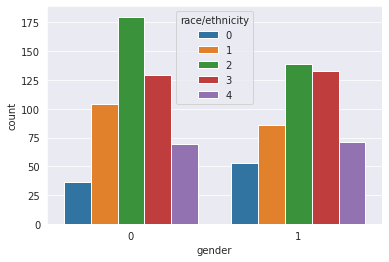

In [9]:
sns.countplot(df['gender'], hue = df['race/ethnicity'])

There are more females in the class, (mostly from Group C)

# # Analysing Test Preparation Course

In [10]:
df['test preparation course'].value_counts()
# 1 - None
# 0 - Completed

1    642
0    358
Name: test preparation course, dtype: int64

([<matplotlib.patches.Wedge at 0x7f804a2fb510>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'None'),
  Text(0.4746018041084478, -0.9923472817199666, 'Completed')])

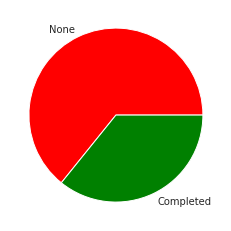

In [11]:
labels = ['None', 'Completed']
colors = ['red', 'green']
plt.pie(df['test preparation course'].value_counts() , labels = labels, colors = colors)

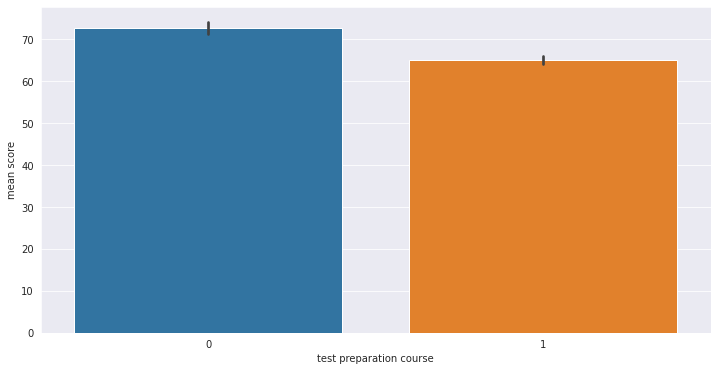

In [12]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'test preparation course', y = 'mean score', data = df)
plt.show()

The students who have completed Preparation Course are scoring good scores

# # Analysing Lunch 

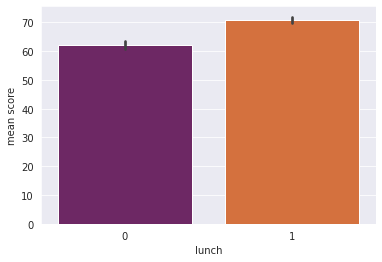

In [13]:
sns.barplot(x = df['lunch'], y = df['mean score'], palette = 'inferno')

The students who get standard lunch are performing better in exams than the students with free/reduced lunch

# # Analysing parental level of education

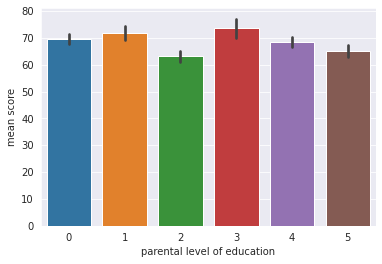

In [14]:
sns.barplot(x = 'parental level of education', y = 'mean score', data = df)

2nd Category of Parental Education belongs to High School and 3rd Category belongs to Master Degree therefore Parents Education is directly proportional to Students Marks

<Figure size 864x432 with 0 Axes>

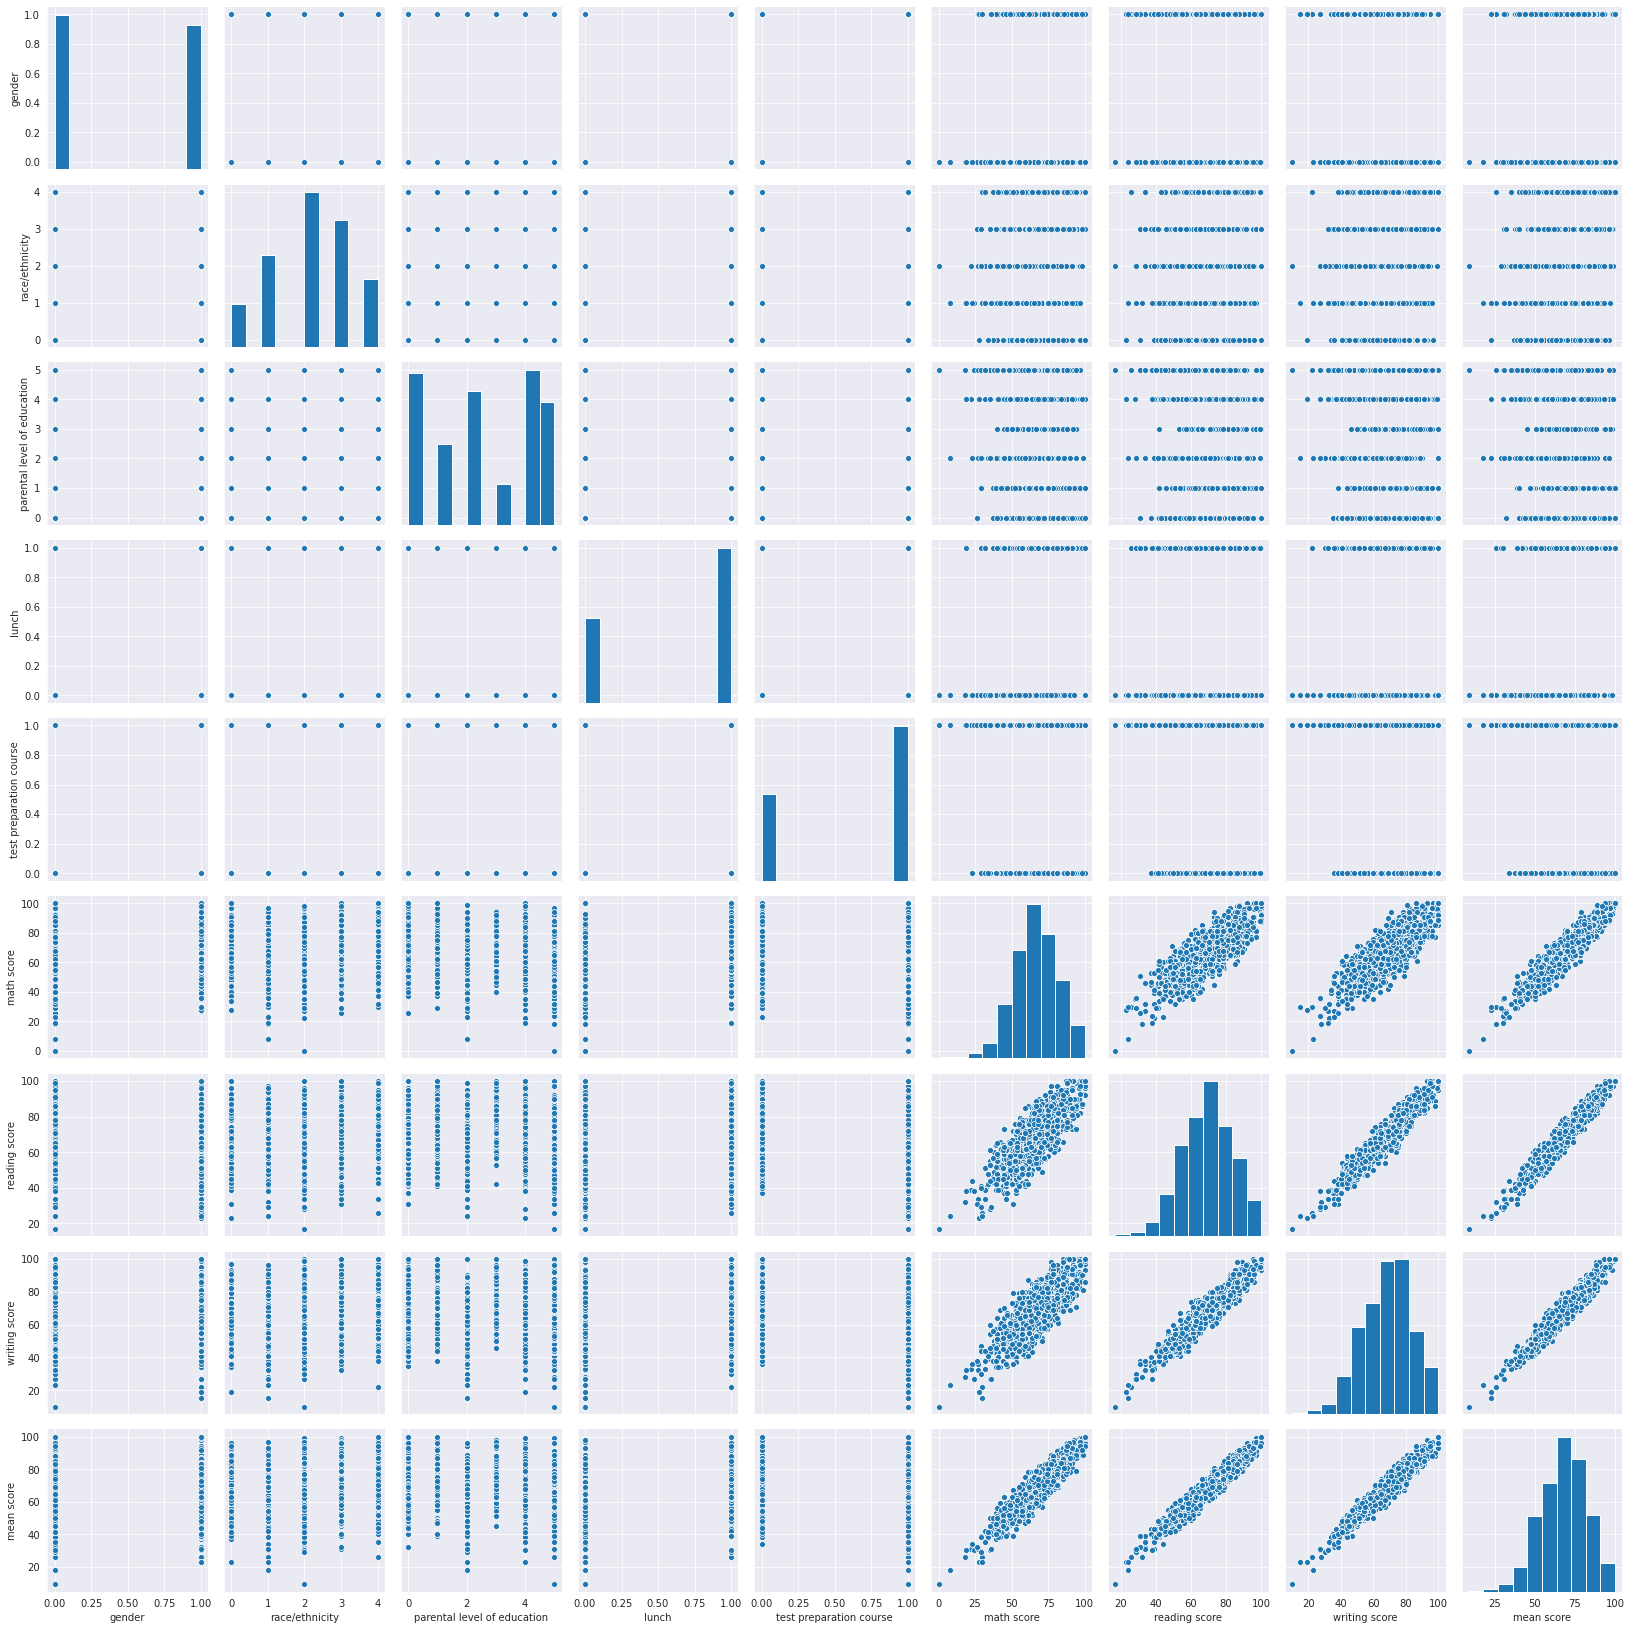

In [15]:
plt.figure(figsize = (12,6))
sns.pairplot(df)
plt.show()

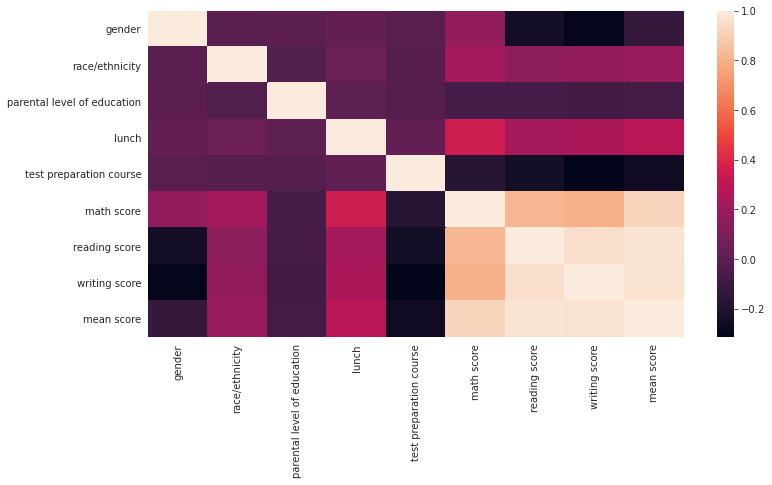

In [16]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())
plt.show()

# # Data Preprocessing

In [17]:
df = df.drop(['math score', 'writing score', 'reading score'],axis = 1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


In [18]:
from sklearn.model_selection import train_test_split
y = df['mean score']
x = df.drop(['mean score'], axis  = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

# # Model Building

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [21]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [22]:
predictions = model.predict(x_test)

In [23]:
difference = abs(predictions - y_test)

In [24]:
difference.mean()

11.03

Average error is 11.03 marks